## Classification d'image et convolutions

On veut faire un modèle de machine learning pour classer des chiffres afin de pouvoir faire de la lecture de compteur electrique automatiquement. 

Pour cela on va faire un premier modèle capable de classer des images contenant un seul chiffre.

Installer keras si c'est nécessaire avec pip ou conda

## Chargement des données

Keras met à disposition le dataset mnist. 

Importer la fonction load_data du sous module tensorflow.keras.datasets.mnist 

In [1]:
from tensorflow.keras.datasets.mnist import load_data

Appeler la fonction load_data et stocker le résultat dans une variable nommée data

In [2]:
data = load_data()

Afficher le type de data

In [3]:
print(type(data))

<class 'tuple'>


Récupérer la première valeur de data dans une variable train et la seconde dans une variable test

In [4]:
train = data[0]
test = data [1]

In [5]:
train, test = data

Afficher le type de la variable train

In [5]:
print("Type de train : ", type(train))
print("Taille = ", len(train))

Type de train :  <class 'tuple'>
Taille =  2


Récupérer la premiere valeur de train dans une variable nommée x_train

In [6]:
X_train = train[0]
X_train = X_train.reshape(-1, 28, 28,1).astype('float64')
X_train = X_train / 255
X_test = test[0]
X_test = X_test.reshape(-1, 28, 28, 1).astype('float64')
X_test = X_test / 255

Récupérer la première valeur de **train** dans une variable nommée **y_train**

In [7]:
y_train = train[1]
y_test = test[1]

Afficher le type et la shape de x_train

In [8]:
print("type x_train :", type(X_train))
print(X_train.shape)

type x_train : <class 'numpy.ndarray'>
(60000, 28, 28, 1)


Faire de même pour **y_train**

In [9]:
print("type y_train :", type(y_train))
print(y_train.shape)

type y_train : <class 'numpy.ndarray'>
(60000,)


## Tracer la répatition d'image selon ses catégoriels

### TRAIN

In [10]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [12]:
import numpy as np

In [13]:
np.unique(y_train,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))

In [14]:
import numpy as np
sizes = np.unique(y_train,return_counts=True)[1]

In [15]:
sizes

array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949])

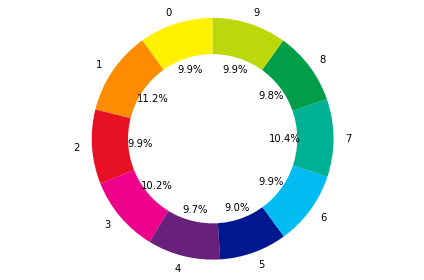

In [16]:
import matplotlib.pyplot as plt
labels = np.unique(y_train,return_counts=True)[0]
colors =['#fff100','#ff8c00','#e81123','#ec008c','#68217a',    '#00188f',
'#00bcf2','#00b294','#009e49','#bad80a']
 
# Construction du diagramme et affichage des labels et des #fréquences en pourcentage

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
# Tracé du cercle au milieu

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Affichage du diagramme

ax1.axis('equal')  
plt.tight_layout()
plt.show()

####: jeux d données de train n'est pas équilibre 
-> peut choisir un fonction dqui permet de faire l'equilibre cet jeux de données

### TEST

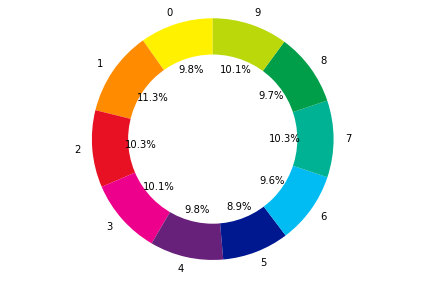

In [17]:
sizes_test = np.unique(y_test,return_counts=True)[1]
labels_test = np.unique(y_test,return_counts=True)[0]
fig2, ax2 = plt.subplots()
ax2.pie(sizes_test, colors = colors, labels=labels_test, autopct='%1.1f%%', startangle=90)
# Tracé du cercle au milieu

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig2 = plt.gcf()
fig2.gca().add_artist(centre_circle)

# Affichage du diagramme

ax2.axis('equal')  
plt.tight_layout()
plt.show()

x_train contient les images du dataset de train. 

Avec matplotlib et la fonction imshow, afficher plusieurs des images. 

Afficher les labels correspondant

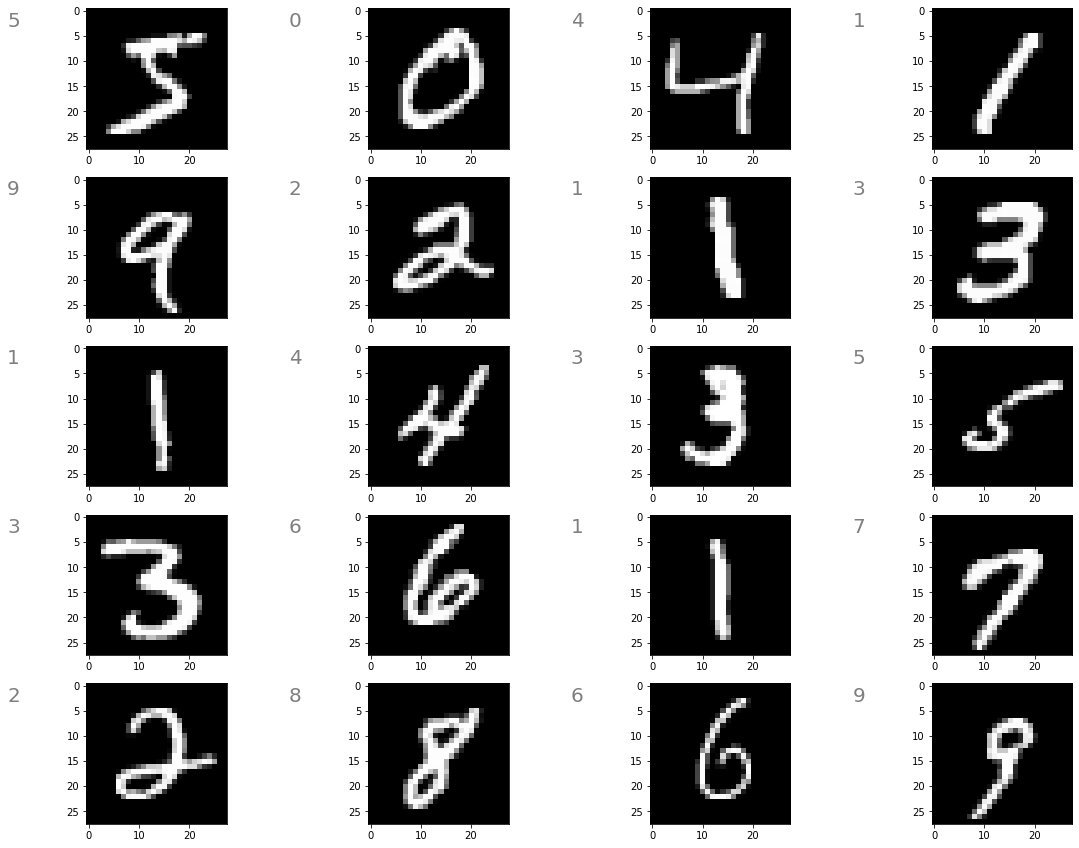

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20, 15))
for i in range(0,20):
    plt.subplot(5,4,i+1)
    plt.text(-15, 2, y_train[i],  ha="center", va="center", size=20, alpha=.5)
    plt.subplots_adjust(left=0.15)
    plt.imshow(X_train[i], cmap="gray")
    

## le modèle 

importer la class Sequential de keras

In [19]:
from keras.models import Sequential

Instancier la classe Sequential de keras dans une variable nommée **model**

In [20]:
model = Sequential()

Import les layers Dense, Flatten et Conv2D du sous module tensorflow.keras.layers

In [21]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D

Avec la méthode model.add :
- Ajouter deux couches Conv2d 
- Ajouter une couche convolutionnelle
- Ajouter 1 couche Dense avec l'activation relu
- Ajouter 1 couche Dense avec l'activation softmax

In [22]:
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(28,28,1)))
#pour la couche intermédiare Conv2D suivant a nb de neuronne plus élevé (augmenté) que la précédente, 
model.add(Conv2D(64, kernel_size=(3, 3), activation="relu")) 
# d’aplatir la matrice. C’est à dire la transformer en vecteur.
model.add(Flatten())

model.add(Dense(400, activation="relu"))
model.add(Dense(10, activation="softmax"))

compiler le modèle avec la bonne loss et l'optimiser de votre choix (par exemple "sgd")

In [23]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

Avant d'entraîner le modèle il faut préparer les données. 

Redimensionner X_train pour obtenir un tableau à 4 dimension (nombre_exemple, hauteur, largeur, nombre_canaux)

In [ ]:
# il faut normalisez des données avant de training de modèle

Entraîner le modèle sur les données de train et choisir epochs=1. Cela suffit-il ? 

In [24]:
history = model.fit(X_train, y_train, epochs=3, validation_data=(X_test, y_test))

Epoch 1/3
1875/1875 [==============================] - 351s 187ms/step - loss: 0.3057 - accuracy: 0.9128 - val_loss: 0.1531 - val_accuracy: 0.9537
Epoch 2/3
1875/1875 [==============================] - 329s 175ms/step - loss: 0.1236 - accuracy: 0.9628 - val_loss: 0.1213 - val_accuracy: 0.9591
Epoch 3/3
1875/1875 [==============================] - 289s 154ms/step - loss: 0.0881 - accuracy: 0.9729 - val_loss: 0.0781 - val_accuracy: 0.9754


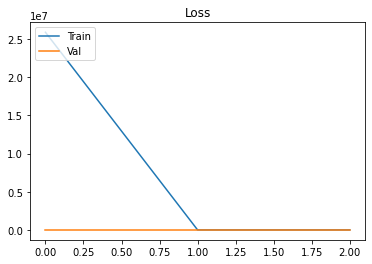

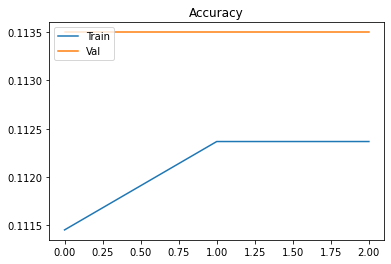

In [33]:
loss_curve = history.history["loss"]
acc_curve = history.history["accuracy"]

loss_val_curve = history.history["val_loss"]
acc_val_curve = history.history["val_accuracy"]

plt.plot(loss_curve, label="Train")
plt.plot(loss_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Loss")
plt.show()

plt.plot(acc_curve, label="Train")
plt.plot(acc_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Accuracy")
plt.show()

Augmenter le nombre d'epoch et voir ce qu'il se passe

Il y a une chose qu'on a pas faite et qui pourrait améliorer l'entraînement. Laquelle ? 

Le faire et vérifier si l'entraînement marche mieux